In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from biopsykit.utils.dataframe_handling import multi_xs
import optuna

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from fau_colors import register_cmaps
register_cmaps()

sns.set_theme(context="paper", style="white", palette="faculties", font_scale=1.2)

%matplotlib widget

In [4]:
def conf_matrix(confusion_matrix):
    x = confusion_matrix.sum(axis=1)[:, np.newaxis]
    confusion_matrix /=x
    confusion_matrix *= 100
    confusion_matrix = round(confusion_matrix,2)
    return confusion_matrix

In [5]:
##### Fill in Algorithm here!! ####
algorithm = "rf"
##### Fill in Algorithm here!! ####

In [6]:
path = Path.cwd().parents[2].joinpath("exports/results_per_algorithm/")
path = path.joinpath(algorithm)
db_path = path.joinpath("db")

# 5 Stage
# Acc only

In [7]:
stage = "5stage"
mod = "acc"

In [8]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [9]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [10]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.547878    0.099575
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.460604    0.101195
getup_latency              6.879464   24.230003
kappa                      0.274252    0.129447
mcc                        0.327801    0.136757
net_sleep_duration       730.625000  185.857273
precision                  0.433722    0.104865
recall                     0.547878    0.099575
sleep_efficiency          74.476083   15.644384
sleep_onset              115.071429   86.849616
sleep_onset_latency       47.736607   64.423955
specifity                  0.837551    0.071456
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   179.808036  134.955046
wake_onset              1038.584821  148.952943

In [11]:
confusion_matrix_acc = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc

,wake,n1,n2,n3,rem
wake,54822.0,0.0,26037.0,0.0,0.0
n1,6911.0,0.0,16191.0,0.0,0.0
n2,12792.0,0.0,80286.0,0.0,5.0
n3,830.0,0.0,16254.0,0.0,0.0
rem,2597.0,0.0,29223.0,0.0,0.0


# 5 Stage
# Acc + HRV

In [12]:
stage = "5stage"
mod = "acc_hrv"

In [13]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [14]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [15]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.560833    0.095287
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.480752    0.098001
getup_latency              6.625000   24.577369
kappa                      0.302881    0.122037
mcc                        0.351206    0.124079
net_sleep_duration       709.000000  190.170940
precision                  0.513806    0.111374
recall                     0.560833    0.095287
sleep_efficiency          72.273631   16.321170
sleep_onset              112.562500   87.254874
sleep_onset_latency       45.227679   60.959054
specifity                  0.844834    0.065854
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   203.691964  143.559518
wake_onset              1040.156250  149.241393

In [16]:
confusion_matrix_acc_hrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv

,wake,n1,n2,n3,rem
wake,57777.0,16.0,22317.0,6.0,743.0
n1,7763.0,45.0,14839.0,8.0,447.0
n2,13118.0,19.0,78672.0,55.0,1219.0
n3,915.0,0.0,15913.0,63.0,193.0
rem,3493.0,18.0,26527.0,38.0,1744.0


# 5 Stage
# ACC + HRV + RRV

In [17]:
stage = "5stage"
mod = "acc_hrv_RRV"

In [18]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [19]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [20]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.611577    0.101288
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.553220    0.107609
getup_latency             12.522321   31.746465
kappa                      0.402925    0.131938
mcc                        0.436987    0.127975
net_sleep_duration       692.084821  197.440158
precision                  0.574399    0.108572
recall                     0.611577    0.101288
sleep_efficiency          70.698856   17.739947
sleep_onset              113.352679   89.606242
sleep_onset_latency       46.017857   66.581011
specifity                  0.863560    0.063002
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   217.584821  153.497409
wake_onset              1037.098214  149.561659

In [21]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_rrv

,wake,n1,n2,n3,rem
wake,61733.0,53.0,15832.0,1.0,3240.0
n1,8764.0,67.0,11767.0,12.0,2492.0
n2,12116.0,68.0,74944.0,272.0,5683.0
n3,635.0,2.0,15568.0,263.0,616.0
rem,4208.0,31.0,13942.0,4.0,13635.0


# 5 Stage
# ACC + HRV + EDR

In [22]:
stage = "5stage"
mod = "acc_hrv_EDR"

In [23]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [24]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [25]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.571630    0.098469
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.498927    0.104368
getup_latency              8.227679   21.721163
kappa                      0.325406    0.126758
mcc                        0.369775    0.126835
net_sleep_duration       704.446429  195.635487
precision                  0.528553    0.116461
recall                     0.571630    0.098469
sleep_efficiency          71.851739   17.040113
sleep_onset              116.482143   91.542681
sleep_onset_latency       49.147321   70.682202
specifity                  0.849293    0.063758
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   205.276786  151.767122
wake_onset              1041.392857  149.250796

In [26]:
confusion_matrix_acc_hrv_edr = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_edr

,wake,n1,n2,n3,rem
wake,58925.0,27.0,20814.0,5.0,1088.0
n1,7825.0,42.0,14319.0,1.0,915.0
n2,12975.0,38.0,77612.0,188.0,2270.0
n3,920.0,2.0,15441.0,210.0,511.0
rem,3665.0,10.0,23899.0,23.0,4223.0


/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93097/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93097/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93097/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel

Text(0.5, 1.0, 'ACT + HRV + EDR')

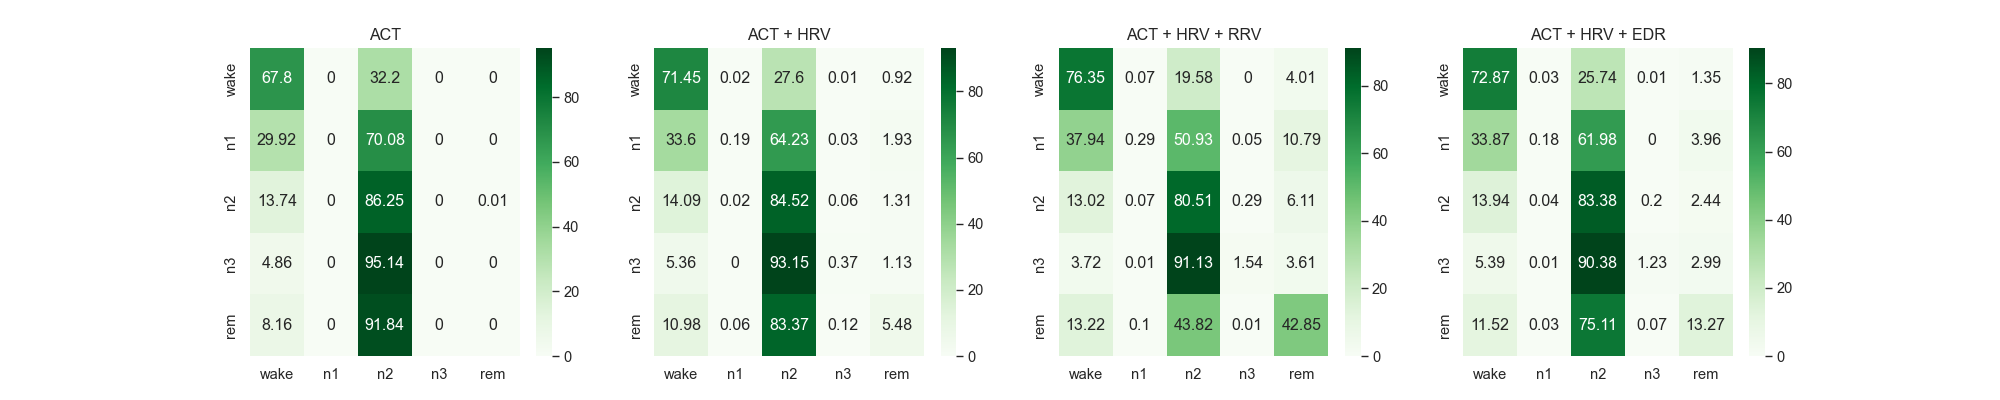

In [27]:
fig, axs = plt.subplots(ncols=4, figsize = (20,4))
sns.heatmap(conf_matrix(confusion_matrix_acc), fmt='g',annot=True, ax=axs[0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv), fmt='g',annot=True, ax=axs[1], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_rrv), fmt='g',annot=True, ax=axs[2], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_edr), fmt='g',annot=True, ax=axs[3], cmap="Greens")
axs[0].set_title("ACT")
axs[1].set_title("ACT + HRV")
axs[2].set_title("ACT + HRV + RRV")
axs[3].set_title("ACT + HRV + EDR")

### Params

In [28]:
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_RRV_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_EDR_" + stage + ".db")[0].best_trial.params)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 12,
 'min_samples_split': 70,
 'n_estimators': 320}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 19,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 12,
 'min_samples_split': 54,
 'n_estimators': 330}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 21,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 25,
 'n_estimators': 350}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 22,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 7,
 'min_samples_split': 18,
 'n_estimators': 350}

# 3 Stage
# Acc

In [29]:
stage = "3stage"
mod = "acc"

In [30]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [31]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [32]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.684856    0.093806
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.629462    0.097315
getup_latency              6.089286   22.875586
kappa                      0.364793    0.167502
mcc                        0.415111    0.166891
net_sleep_duration       793.049107  176.823523
precision                  0.628575    0.088384
recall                     0.684856    0.093806
sleep_efficiency          80.844969   13.888054
sleep_onset              105.281250   82.821470
sleep_onset_latency       37.946429   51.941471
specifity                  0.808301    0.110738
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   131.852679  123.497066
wake_onset              1040.205357  148.712902

In [33]:
confusion_matrix_acc = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc

,wake,nrem,rem
wake,48435.0,32424.0,0.0
nrem,13010.0,120253.0,6.0
rem,1318.0,30502.0,0.0


# 3 Stage
# Acc + HRV

In [34]:
stage = "3stage"
mod = "acc_hrv"

In [35]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [36]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [37]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.693986    0.092889
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.643396    0.097370
getup_latency              6.120536   23.863565
kappa                      0.392584    0.162695
mcc                        0.438279    0.157552
net_sleep_duration       773.401786  176.401446
precision                  0.680142    0.097571
recall                     0.693986    0.092889
sleep_efficiency          78.893656   14.266972
sleep_onset              105.035714   84.230618
sleep_onset_latency       37.700893   55.101169
specifity                  0.812135    0.102766
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   149.607143  128.144317
wake_onset              1041.339286  148.830301

In [38]:
confusion_matrix_acc_hrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv

,wake,nrem,rem
wake,51572.0,29077.0,210.0
nrem,14057.0,118740.0,472.0
rem,1806.0,29352.0,662.0


# 3 Stage
# Acc + HRV + RRV

In [39]:
stage = "3stage"
mod = "acc_hrv_RRV"

In [40]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [41]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [42]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.731710    0.096123
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.709789    0.101653
getup_latency              8.508929   24.582795
kappa                      0.496520    0.155837
mcc                        0.526161    0.143471
net_sleep_duration       758.334821  187.118100
precision                  0.758938    0.071602
recall                     0.731710    0.096123
sleep_efficiency          77.447695   15.988647
sleep_onset              108.026786   86.902395
sleep_onset_latency       40.691964   61.032805
specifity                  0.826941    0.087178
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   162.147321  141.905706
wake_onset              1041.111607  148.595973

In [43]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_rrv

,wake,nrem,rem
wake,55533.0,23461.0,1865.0
nrem,13799.0,114711.0,4759.0
rem,2268.0,19679.0,9873.0


# 3 Stage
# Acc + HRV + EDR

In [44]:
stage = "3stage"
mod = "acc_hrv_EDR"

In [45]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [46]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [47]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.701688    0.090766
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.658291    0.096870
getup_latency              6.709821   20.611736
kappa                      0.414686    0.155981
mcc                        0.456537    0.148989
net_sleep_duration       768.366071  182.221124
precision                  0.704097    0.092228
recall                     0.701688    0.090766
sleep_efficiency          78.395846   15.005730
sleep_onset              108.571429   85.811736
sleep_onset_latency       41.236607   58.266069
specifity                  0.815136    0.096345
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   153.950893  137.282342
wake_onset              1042.910714  148.699116

In [48]:
confusion_matrix_acc_hrv_edr = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_edr

,wake,nrem,rem
wake,52861.0,27617.0,381.0
nrem,14084.0,117721.0,1464.0
rem,1997.0,27501.0,2322.0


/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93097/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93097/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93097/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel

Text(0.5, 1.0, 'ACT + HRV + EDR')

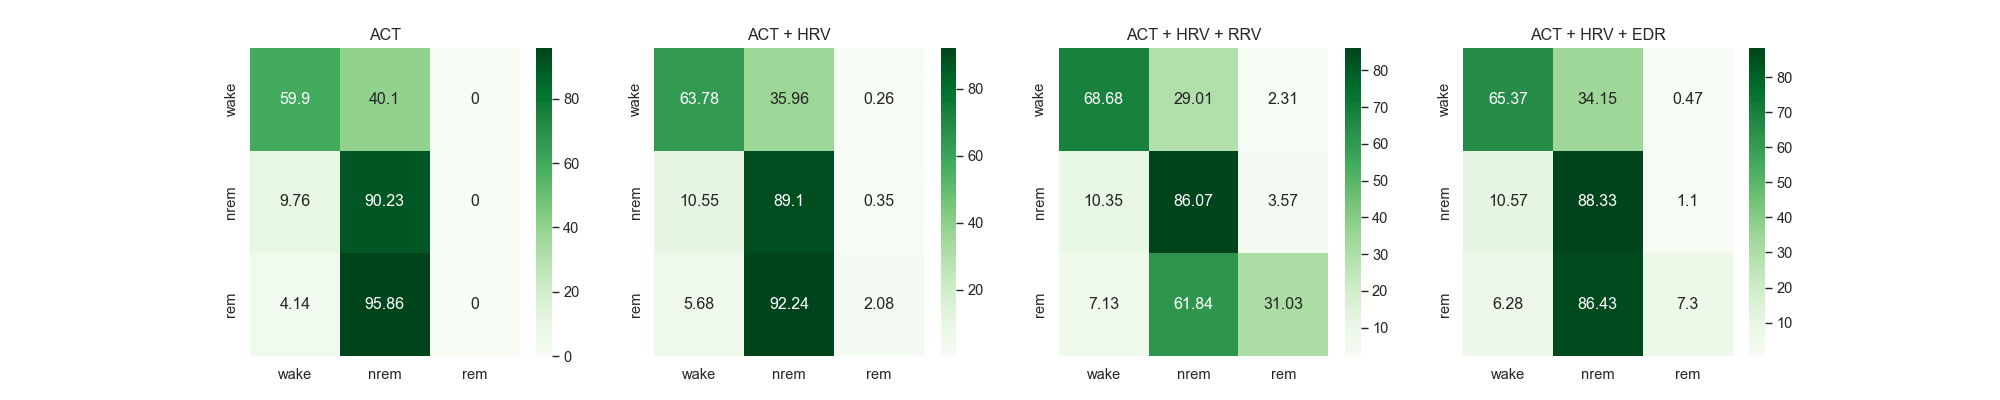

In [49]:
fig, axs = plt.subplots(ncols=4, figsize = (20,4))
sns.heatmap(conf_matrix(confusion_matrix_acc), fmt='g',annot=True, ax=axs[0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv), fmt='g',annot=True, ax=axs[1], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_rrv), fmt='g',annot=True, ax=axs[2], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_edr), fmt='g',annot=True, ax=axs[3], cmap="Greens")
axs[0].set_title("ACT")
axs[1].set_title("ACT + HRV")
axs[2].set_title("ACT + HRV + RRV")
axs[3].set_title("ACT + HRV + EDR")

### Params

In [50]:
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_RRV_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_EDR_" + stage + ".db")[0].best_trial.params)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 64,
 'n_estimators': 320}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 28,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 70,
 'n_estimators': 260}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 32,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 330}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 38,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 19,
 'n_estimators': 320}

# Binary
# Acc only

In [51]:
stage = "binary"
mod = "acc"

In [52]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [53]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [54]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.809827    0.105334
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.858057    0.096022
getup_latency              5.450893   19.547970
kappa                      0.518098    0.221555
mcc                        0.547689    0.210701
net_sleep_duration       806.410714  172.827478
precision                  0.817513    0.113839
recall                     0.918152    0.110317
sleep_efficiency          82.215329   13.256147
sleep_onset              102.602679   81.961263
sleep_onset_latency       35.267857   50.500630
specifity                  0.572491    0.211007
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   122.000000  117.371512
wake_onset              1041.008929  148.673567

In [55]:
confusion_matrix_acc = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc

,wake,sleep
wake,46774.0,34085.0
sleep,12609.0,152480.0


# Binary
# Acc + HRV

In [56]:
stage = "binary"
mod = "acc_hrv"

In [57]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [58]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [59]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.816740    0.104271
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.862412    0.094913
getup_latency              5.267857   19.374053
kappa                      0.540755    0.216739
mcc                        0.569732    0.202846
net_sleep_duration       796.183036  171.216165
precision                  0.827221    0.115055
recall                     0.916999    0.109628
sleep_efficiency          81.213730   13.371192
sleep_onset              101.736607   83.411494
sleep_onset_latency       34.401786   51.457494
specifity                  0.601708    0.215694
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   132.022321  119.627053
wake_onset              1042.290179  148.531076

In [60]:
confusion_matrix_acc_hrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv

,wake,sleep
wake,48886.0,31973.0
sleep,12950.0,152139.0


# Binary
# Acc + HRV + RRV

In [61]:
stage = "binary"
mod = "acc_hrv_RRV"

In [62]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [63]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [64]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.833381    0.097975
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.871844    0.099123
getup_latency              7.058036   22.100489
kappa                      0.587450    0.194607
mcc                        0.615267    0.174858
net_sleep_duration       784.348214  179.153426
precision                  0.845669    0.108200
recall                     0.919233    0.120580
sleep_efficiency          80.072859   14.711174
sleep_onset              102.821429   82.681431
sleep_onset_latency       35.486607   53.442562
specifity                  0.648916    0.208176
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   142.183036  134.352950
wake_onset              1042.562500  148.429795

In [65]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_rrv

,wake,sleep
wake,52590.0,28269.0
sleep,12649.0,152440.0


# Binary
# Acc + HRV + EDR

In [66]:
stage = "binary"
mod = "acc_hrv_EDR"

In [67]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [68]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [69]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.821027    0.100210
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.864780    0.093227
getup_latency              6.308036   20.294441
kappa                      0.552609    0.206355
mcc                        0.581483    0.192111
net_sleep_duration       791.924107  175.860367
precision                  0.833458    0.111993
recall                     0.915942    0.112337
sleep_efficiency          80.791983   13.973808
sleep_onset              106.843750   85.248556
sleep_onset_latency       39.508929   57.480353
specifity                  0.616078    0.213617
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   133.160714  126.005093
wake_onset              1043.312500  148.584172

In [70]:
confusion_matrix_acc_hrv_edr = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_edr

,wake,sleep
wake,50099.0,30760.0
sleep,13119.0,151970.0


/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93097/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93097/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93097/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel

Text(0.5, 1.0, 'ACT + HRV + EDR')

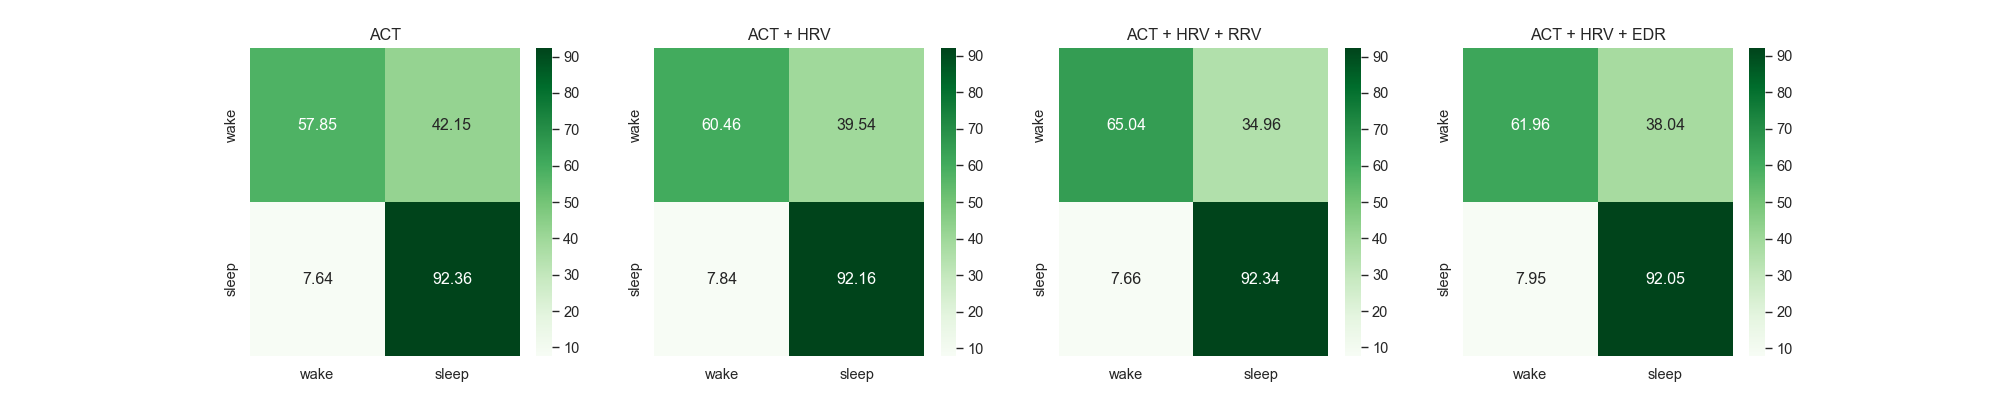

In [71]:
fig, axs = plt.subplots(ncols=4, figsize = (20,4))
sns.heatmap(conf_matrix(confusion_matrix_acc), fmt='g',annot=True, ax=axs[0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv), fmt='g',annot=True, ax=axs[1], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_rrv), fmt='g',annot=True, ax=axs[2], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_edr), fmt='g',annot=True, ax=axs[3], cmap="Greens")
axs[0].set_title("ACT")
axs[1].set_title("ACT + HRV")
axs[2].set_title("ACT + HRV + RRV")
axs[3].set_title("ACT + HRV + EDR")

### Params

In [72]:
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_RRV_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_EDR_" + stage + ".db")[0].best_trial.params)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 61,
 'n_estimators': 270}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 27,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 9,
 'min_samples_split': 14,
 'n_estimators': 310}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 37,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 17,
 'n_estimators': 350}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 13,
 'n_estimators': 350}